In [143]:
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor


In [2]:
path = '/home/anna/Desktop/Stream_Ecology/Ecel_Sheets/Diatom_Data'
diatoms_all = pd.read_excel('/home/anna/Desktop/Stream_Ecology/Ecel_Sheets/All Taxa.xls', index_col = None)
diatoms_unique = pd.DataFrame(diatoms_all.drop_duplicates())


def compile(path, diatoms_unique): 
    ID = 1
    percent = 1
    for file in os.listdir(path):
        if file.endswith('xls'):
            full_path = os.path.join(path, file)
            data = pd.read_excel(full_path)
            data = data.rename(columns={'Taxon Name ':'Taxa', 'SampleID':ID, '%':percent}).drop(columns=['Count ', 'Valves/mg', 'Count ID'])
            diatoms_unique = pd.merge(diatoms_unique, data, on = 'Taxa', how = 'outer')
            # print(diatoms_unique)
            ID = ID +1
            percent = percent + 1
    return diatoms_unique

df = compile(path, diatoms_unique)
df = df.T
df.columns = df.iloc[0]   
df = df.fillna(0)
df = df.drop('Taxa')  
# df

In [3]:
df = df.reset_index(drop=True)
df = df.iloc[::2]


In [4]:
index = [
 'COH029',
 'COH002',
 'COH028',
 'COH012',
 'COH026',
 'COH009',
 'COH010',
 'COH013',
 'COH014',
 'COH004',
 'COH016',
 'COH007',
 'COH021',
 'COH017',
 'COH018',
 'COH030',
 'COH006',
 'COH022',
 'COH011',
 'COH024']

df.index = index

In [5]:
nutrient_data = pd.read_excel('/home/anna/Desktop/Stream_Ecology/Ecel_Sheets/Antarctic_Season1_CNP_Enzymes_Metadata_no_formulas.xlsx')
nutrient_data.columns
# nutrient_data.head()
nutrient_data = nutrient_data.drop(columns=['Wet_dry_conversion', 'Qubit_raw_ng/uL','g_wet_extracted_DNA', 'Qubit_ng_DNA/g_cryo',
       'Chl-a_raw_ug/L', 'g_wet_extracted_chla', 'ug_chl-a/g_cryo',
       'g_weighboat', 'g_wet', 'g_dry_plusboat', 'g_ashed_plusboat', 'Tardigrades_extracted', 'Rotifers_extracted',
       'Ciliates_extracted', 'ml_in_extraction', 'ml_counted', 
      'TC_percent', 'TN_percent', 'BG/(NAG+LAP)', '(NAG+LAP)/Phos',
       'BG/Phos', 'AG', 'BG', 'BXYL', 'CBH', 'LAP', 'NAG', 'PHOS',
       'percent_OM_nonacifidified', 'percent_OM_acid',
       'percent_OM_leached_with_water_instead_of_acid'])
# nutrient_data


In [ ]:
coo = nutrient_data.iloc[30:60]
# print(coo['SampleID'])


per_org_mean = coo['percent_organic'].mean()
f_mean = coo['Fluorescence'].mean()
microfauna_mean = coo['g_wet_microfauna'].mean()
tard_mean = coo['Tardigrades/g_dry'].mean()
rot_mean = coo['Rotifers/g_dry'].mean()
cil_mean = coo['Ciliates/g_dry'].mean()
ph_mean = coo['pH_lab'].mean()
elec_mean = coo['electrical_conductivity'].mean()

coo['percent_organic'].fillna(per_org_mean, inplace=True)
coo['Fluorescence'].fillna(f_mean, inplace=True)
coo['g_wet_microfauna'].fillna(microfauna_mean, inplace=True)
coo['Tardigrades/g_dry'].fillna(tard_mean, inplace=True)
coo['Rotifers/g_dry'].fillna(rot_mean, inplace=True)
coo['Ciliates/g_dry'].fillna(cil_mean, inplace=True)
coo['pH_lab'].fillna(ph_mean, inplace=True)
coo['electrical_conductivity'].fillna(elec_mean, inplace=True)

In [7]:
coo = pd.DataFrame(coo)
coo = coo.set_index('SampleID')
# coo

In [8]:
rf_dataset = pd.merge(df, coo, left_index=True, right_index=True)

In [9]:
rf_dataset

,Luticola mutica,Luticola gaussii,Humidophila arcuata var. parallela,Luticola laeta,Luticola mcknightiae,Muelleria supra,Luticola permuticopsis,Humidophila arcuata,Muelleria peraustralis,Craticula molestiformis,...,Rotifers/g_dry,Ciliates/g_dry,Diameter_1_cm,Diameter_2_cm,Depth_cm,pH_lab,electrical_conductivity,TC_ppm,TN_ppm,TP_ppm
COH029,4.29,8.93,72.86,0,1.07,0.36,0,6.07,4.64,0,...,0.03,0.00,30.0,24,17,7.280000,81.5,12750.0,1768.0,741.0
COH002,1.66,11.59,63.25,6.62,2.65,4.97,0.99,3.97,2.98,0.33,...,0.20,0.07,28.0,28,17,7.225714,104.1,13760.0,2093.0,255.0
COH028,1.67,11.67,66.67,5.0,1.0,3.0,0,4.67,5.67,0,...,0.97,0.10,25.0,25,20,7.225714,104.1,3613.0,603.0,629.0
COH012,3.58,12.05,56.68,1.3,0.98,1.3,0,18.24,3.58,0,...,0.66,1.99,19.0,19,20,7.330000,204.4,9354.0,1295.0,565.0
COH026,1.0,14.62,61.79,7.31,1.33,4.32,0,4.32,2.66,0,...,0.14,0.00,19.0,24,24,6.960000,89.2,2968.0,360.0,809.0
COH009,3.92,6.54,34.31,1.63,3.92,7.84,0,36.28,5.56,0,...,0.50,0.01,27.0,30,17,7.225714,104.1,3020.0,506.0,129.0
COH010,3.32,15.95,45.52,10.63,4.65,4.32,2.33,8.64,4.32,0.33,...,0.43,0.06,30.0,30,14,7.225714,104.1,2313.0,486.0,181.0
COH013,3.3,11.88,55.45,6.93,1.98,4.29,4.29,4.29,4.95,0,...,1.19,0.00,23.0,18,17,7.225714,104.1,5977.0,1050.0,710.0
COH014,6.89,8.53,51.15,9.84,0.98,4.92,2.3,6.89,5.25,0,...,0.53,0.00,18.0,18,15,7.225714,104.1,5278.0,901.0,900.0
COH004,1.66,15.89,48.34,3.64,1.66,3.31,0,19.54,5.3,0,...,0.31,0.05,24.0,21,15,7.225714,104.1,7428.0,1258.0,200.0


In [12]:
rf_dataset.columns #Fluoresence is a measure of chloroplast. 

Index(['Luticola mutica ', 'Luticola gaussii ',
       'Humidophila arcuata var. parallela ', 'Luticola laeta ',
       'Luticola mcknightiae ', 'Muelleria supra ', 'Luticola permuticopsis ',
       'Humidophila arcuata ', 'Muelleria peraustralis ',
       'Craticula molestiformis ', 'Mayamaea atomus var. #1 ',
       'Chamaepinnularia deltaica ', 'Fistulifera pelliculosa ',
       'Humidophila australis ', 'Luticola murrayi ',
       'Luticola austroatlantica ', 'Luticola dolia ',
       'Craspedostauros laevissiumus ', 'Luticola sp. #2 ',
       'Luticola spainiae ', 'Luticola muticopsis ', 'Muelleria cryoconicola ',
       'Hantzschia amphioxys ', 'Fluorescence', 'percent_organic',
       'g_wet_microfauna', 'Tardigrades/g_dry', 'Rotifers/g_dry',
       'Ciliates/g_dry', 'Diameter_1_cm', 'Diameter_2_cm', 'Depth_cm',
       'pH_lab', 'electrical_conductivity', 'TC_ppm', 'TN_ppm', 'TP_ppm'],
      dtype='object')

### Decision Tree

In [95]:
features = rf_dataset.drop(['Luticola mcknightiae ',  'Fluorescence'], axis=1)
features
target = rf_dataset['Luticola mcknightiae ']
target

,Luticola mutica,Luticola gaussii,Humidophila arcuata var. parallela,Luticola laeta,Muelleria supra,Luticola permuticopsis,Humidophila arcuata,Muelleria peraustralis,Craticula molestiformis,Mayamaea atomus var. #1,...,Rotifers/g_dry,Ciliates/g_dry,Diameter_1_cm,Diameter_2_cm,Depth_cm,pH_lab,electrical_conductivity,TC_ppm,TN_ppm,TP_ppm
COH029,4.29,8.93,72.86,0,0.36,0,6.07,4.64,0,0,...,0.03,0.00,30.0,24,17,7.280000,81.5,12750.0,1768.0,741.0
COH002,1.66,11.59,63.25,6.62,4.97,0.99,3.97,2.98,0.33,0.33,...,0.20,0.07,28.0,28,17,7.225714,104.1,13760.0,2093.0,255.0
COH028,1.67,11.67,66.67,5.0,3.0,0,4.67,5.67,0,0,...,0.97,0.10,25.0,25,20,7.225714,104.1,3613.0,603.0,629.0
COH012,3.58,12.05,56.68,1.3,1.3,0,18.24,3.58,0,0,...,0.66,1.99,19.0,19,20,7.330000,204.4,9354.0,1295.0,565.0
COH026,1.0,14.62,61.79,7.31,4.32,0,4.32,2.66,0,0,...,0.14,0.00,19.0,24,24,6.960000,89.2,2968.0,360.0,809.0
COH009,3.92,6.54,34.31,1.63,7.84,0,36.28,5.56,0,0,...,0.50,0.01,27.0,30,17,7.225714,104.1,3020.0,506.0,129.0
COH010,3.32,15.95,45.52,10.63,4.32,2.33,8.64,4.32,0.33,0,...,0.43,0.06,30.0,30,14,7.225714,104.1,2313.0,486.0,181.0
COH013,3.3,11.88,55.45,6.93,4.29,4.29,4.29,4.95,0,0,...,1.19,0.00,23.0,18,17,7.225714,104.1,5977.0,1050.0,710.0
COH014,6.89,8.53,51.15,9.84,4.92,2.3,6.89,5.25,0,0,...,0.53,0.00,18.0,18,15,7.225714,104.1,5278.0,901.0,900.0
COH004,1.66,15.89,48.34,3.64,3.31,0,19.54,5.3,0,0,...,0.31,0.05,24.0,21,15,7.225714,104.1,7428.0,1258.0,200.0


In [138]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [139]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [140]:
y_pred = regressor.predict(X_test)

In [141]:
y_pred #This is the % abundance prediction of 'Luticola mcknightiae '

array([4.33, 2.31, 1.  , 2.32])

In [142]:
# Calculate MSE, MAE, and R^2 score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")
print("Feature Importance:", regressor.feature_importances_)

Mean Squared Error: 2.7081749999999998
Mean Absolute Error: 0.9774999999999999
R^2 Score: -5.153981622189716
Feature Importance: [5.96051803e-02 2.01831917e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.85336930e-06
 1.17651883e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.71917586e-03 0.00000000e+00 0.00000000e+00 1.04406470e-02
 0.00000000e+00 2.14249491e-03 0.00000000e+00 1.18615635e-04
 0.00000000e+00 0.00000000e+00 3.76827123e-01 0.00000000e+00
 0.00000000e+00 2.42889129e-01 0.00000000e+00 0.00000000e+00
 1.66803237e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.72473087e-02 2.58208284e-01]


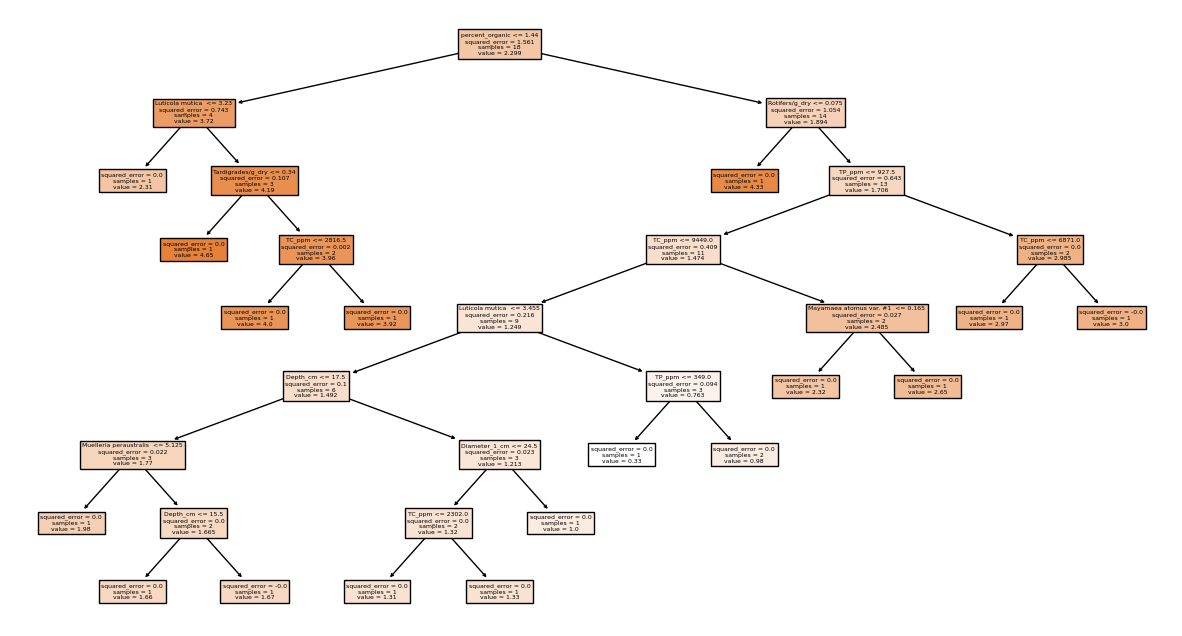

In [137]:
plt.figure(figsize=(15, 8))
plot_tree(regressor, feature_names=features.columns, filled=True)
plt.show()

### Random Forests

In [130]:
rf = RandomForestRegressor(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [131]:
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

R^2 Score: -1.8744875473434406
Mean Squared Error: 1.2649721418499935


<Axes: xlabel='Humidophila arcuata var. parallela ', ylabel='TP_ppm'>

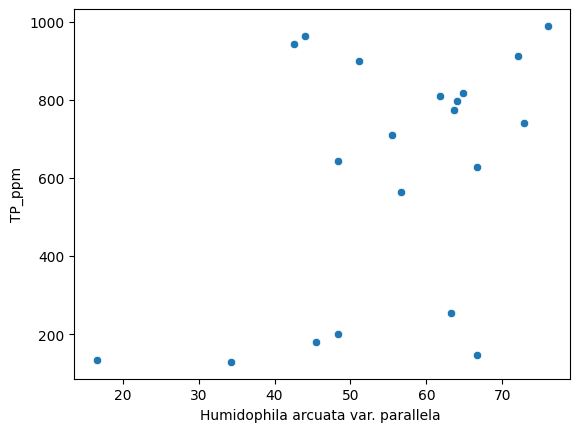

In [163]:
sns.scatterplot(data = rf_dataset, x='Humidophila arcuata var. parallela ', y = 'TP_ppm')

In [151]:
rf_dataset.columns

Index(['Luticola mutica ', 'Luticola gaussii ',
       'Humidophila arcuata var. parallela ', 'Luticola laeta ',
       'Luticola mcknightiae ', 'Muelleria supra ', 'Luticola permuticopsis ',
       'Humidophila arcuata ', 'Muelleria peraustralis ',
       'Craticula molestiformis ', 'Mayamaea atomus var. #1 ',
       'Chamaepinnularia deltaica ', 'Fistulifera pelliculosa ',
       'Humidophila australis ', 'Luticola murrayi ',
       'Luticola austroatlantica ', 'Luticola dolia ',
       'Craspedostauros laevissiumus ', 'Luticola sp. #2 ',
       'Luticola spainiae ', 'Luticola muticopsis ', 'Muelleria cryoconicola ',
       'Hantzschia amphioxys ', 'Fluorescence', 'percent_organic',
       'g_wet_microfauna', 'Tardigrades/g_dry', 'Rotifers/g_dry',
       'Ciliates/g_dry', 'Diameter_1_cm', 'Diameter_2_cm', 'Depth_cm',
       'pH_lab', 'electrical_conductivity', 'TC_ppm', 'TN_ppm', 'TP_ppm'],
      dtype='object')

In [ ]:
### To - do
#Non-parametric tests and estimate p-value (correlation)
#Stats just normal histogram and QQ visualizations between variables
#simulating new data and re-analyzing using DT